In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
df=pd.read_csv("Algerian_forest_fires_cleaned.csv")
df.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
##Drop the columns day,month,year
df.drop(["day","month","year"],axis=1,inplace=True)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [9]:
df["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [10]:
##Encoding-Conversion of Categorical Class data into numerical form
df["Classes"]=np.where(df["Classes"].str.contains("not fire"),0,1)

In [11]:
df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int32  
 11  Region       243 non-null    int64  
dtypes: float64(7), int32(1), int64(4)
memory usage: 22.0 KB


In [13]:
## Independent and dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']


In [15]:
X.head(),type(X)

(   Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  Classes  Region
 0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4        0       0
 1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9        0       0
 2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7        0       0
 3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7        0       0
 4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9        0       0,
 pandas.core.frame.DataFrame)

In [16]:
y.head(),type(y)

(0    0.5
 1    0.4
 2    0.1
 3    0.0
 4    0.5
 Name: FWI, dtype: float64,
 pandas.core.series.Series)

In [17]:
##Train-Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [18]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [28]:
##Checking for correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


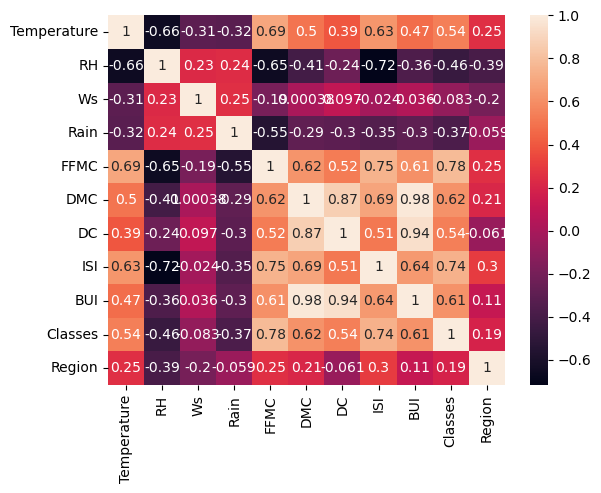

<Figure size 2000x2000 with 0 Axes>

In [27]:
sns.heatmap(X_train.corr(),annot=True)
plt.figure(figsize=(20,20))
plt.show()

In [ ]:
## Function to Check for collinearity of independent variables
def correlation(dataset,threshold):
    col_corr=set()##since set consists of only unique values
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>threshold):
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [31]:
##Checking for collinearity
##Threshold is chosen by domain expertise bases on certain conditions and scenarios
corr_features=correlation(X_train,0.85)

In [32]:
corr_features

{'BUI', 'DC'}

In [35]:
##Dropping features with correlation greater than 0.85
X_train.drop(corr_features,axis=1,inplace=True)

In [36]:
X_test.drop(corr_features,axis=1,inplace=True)


In [37]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [38]:
##Standardization using standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [39]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

## box plots to understand the effect of scaling


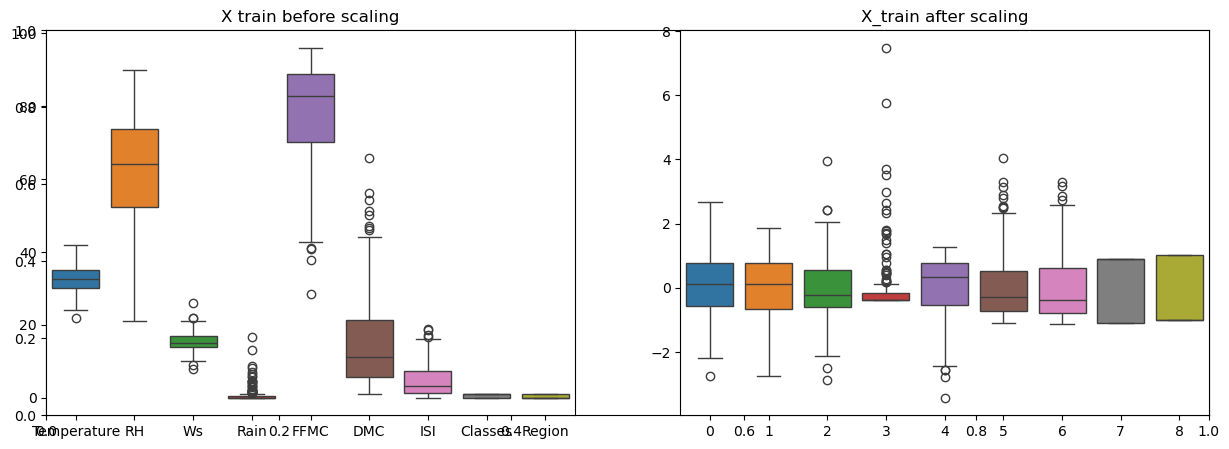

In [45]:
##Box plots
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after scaling')
plt.show()

## Applying Linear Regression algorithm


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
regressor=LinearRegression()
regressor.fit(X_train_scaled,y_train)
y_pred=regressor.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Squared Error:\n",mse)
print("Mean Absolute Error:\n",mae)
print("R2 Score:\n",score)

Mean Squared Error:
 0.6742766873791594
Mean Absolute Error:
 0.5468236465249994
R2 Score:
 0.9847657384266951


## Appling Lasso Regression Algorithm

In [48]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Squared Error:\n",mse)
print("Mean Absolute Error:\n",mae)
print("R2 Score:\n",score)

Mean Squared Error:
 2.248345891897475
Mean Absolute Error:
 1.1331759949144085
R2 Score:
 0.9492020263112388


## Performing Cross Validation techniques

In [49]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso_cv=LassoCV(cv=5)
lasso_cv.fit(X_train_scaled,y_train)
y_pred=lasso_cv.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Squared Error:\n",mse)
print("Mean Absolute Error:\n",mae)
print("R2 Score:\n",score)

Mean Squared Error:
 0.7924995554743626
Mean Absolute Error:
 0.6199701158263432
R2 Score:
 0.9820946715928275
